# Reading file

In [1]:
import pandas as pd

file_name = "simpsons_script_lines.csv"
df = pd.read_csv(file_name,  error_bad_lines=False)
df = df.dropna()
df

c:\users\ray\documents\shhh\env\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSk

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158243,9544,32,204,Miss Hoover: (OFF LISA'S REACTION) I'm back.,831000,true,464,3.0,Miss Hoover,Springfield Elementary School,I'm back.,im back,2.0
158244,9545,32,205,"Miss Hoover: You see, class, my Lyme disease t...",839000,true,464,3.0,Miss Hoover,Springfield Elementary School,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,10.0
158245,9546,32,206,Miss Hoover: Psy-cho-so-ma-tic.,842000,true,464,3.0,Miss Hoover,Springfield Elementary School,Psy-cho-so-ma-tic.,psy-cho-so-ma-tic,1.0
158246,9547,32,207,Ralph Wiggum: Does that mean you were crazy?,844000,true,119,3.0,Ralph Wiggum,Springfield Elementary School,Does that mean you were crazy?,does that mean you were crazy,6.0


### We can see a reasonable number of lines for our data, we need to analyse the number of classes and their distribution.

In [2]:
df['spoken_words']

0         No, actually, it was a little of both. Sometim...
1                                    Where's Mr. Bergstrom?
2         I don't know. Although I'd sure like to talk t...
3                                That life is worth living.
4         The polls will be open from now until the end ...
                                ...                        
158243                                            I'm back.
158244    You see, class, my Lyme disease turned out to ...
158245                                   Psy-cho-so-ma-tic.
158246                       Does that mean you were crazy?
158247                    No, that means she was faking it.
Name: spoken_words, Length: 131685, dtype: object

In [3]:
df['location_id'].unique()

array([  3., 374., 375., ..., 370., 371., 373.])

In [4]:
df['location_id'].unique()
distribution_class = df['location_id'].value_counts()

In [5]:
distribution_class = df['location_id'].value_counts()
distribution_class
print(distribution_class.mean())
print(distribution_class.min())

33.170025188916874
1


c:\users\ray\documents\shhh\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='location_id'>

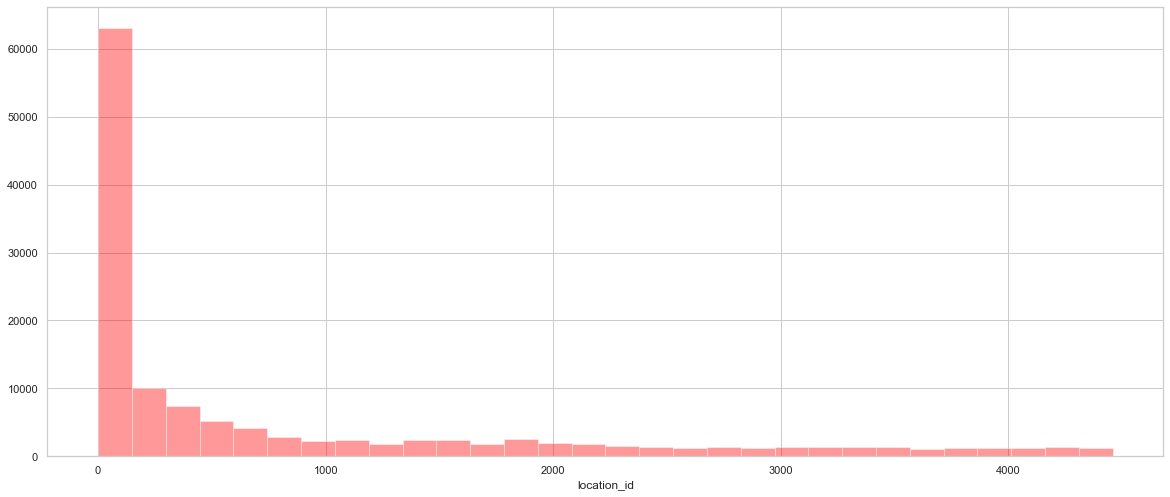

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20  ,8.27)})
sns.set_style('whitegrid')
sns.distplot(df['location_id'], kde = False, color ='red', bins = 30)

### I delete the categories which had less than 15 examples because this isn't sufficient to learn anything for a model, and might be outliers then for the training part.

In [7]:
### We can see ditr

In [8]:
#distribution_class
for i, v in distribution_class.items():
    #print('index: ', i, 'value: ', v)
    if v<15:
        df = df[df.location_id != i]

<AxesSubplot:xlabel='location_id'>

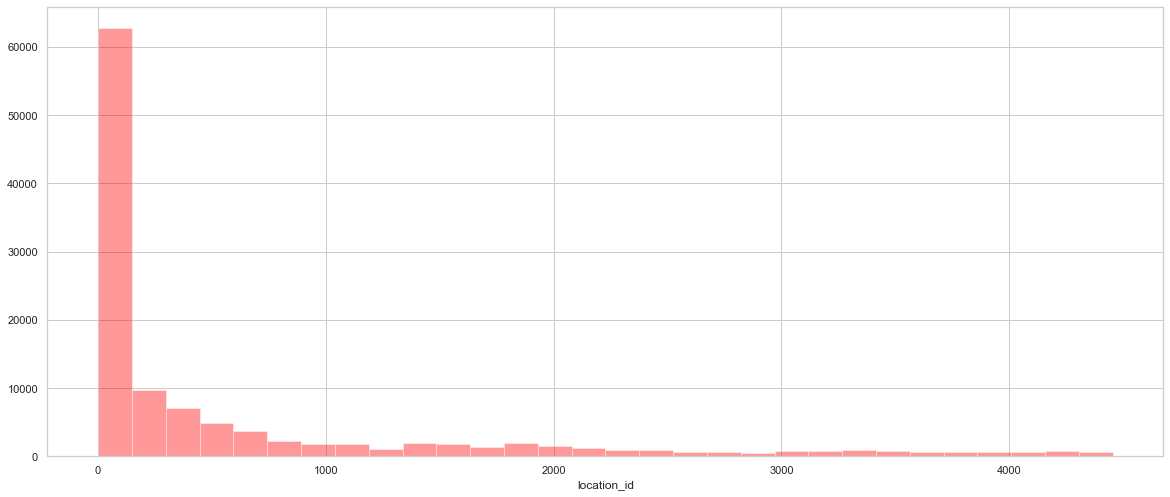

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20  ,8.27)})
sns.set_style('whitegrid')
sns.distplot(df['location_id'], kde = False, color ='red', bins = 30)

## There is one dominant class which can cause overfitting problem, to resolve this problem i opt for an undersampling method to equalize the distribution, but i could also synthetize new examples for the other classes ( using SMOTE for example ).

In [10]:
distribution_class = df['location_id'].value_counts()
print(distribution_class.mean())
print(distribution_class.min())

97.32912457912458
15


           id  episode_id  number  \
0      153383         549      13   
1       75417         262      46   
2       15824          52     267   
3       22111          74     230   
4       16451          54     242   
...       ...         ...     ...   
36922  158275         568     165   
36923  158276         568     166   
36924  158277         568     167   
36925  158278         568     168   
36926  158279         568     169   

                                                raw_text timestamp_in_ms  \
0                         Paramedic: (QUICK) No, no, no!          216000   
1                             Bart Simpson: Who are you?          305000   
2                    Woman: The dryer goes on the right.         1041000   
3      Homer Simpson: You know, one day honest citize...         1003000   
4      Kent Brockman: Hmm huh. And I suppose you want...         1191000   
...                                                  ...             ...   
36922                Ho

c:\users\ray\documents\shhh\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='location_id'>

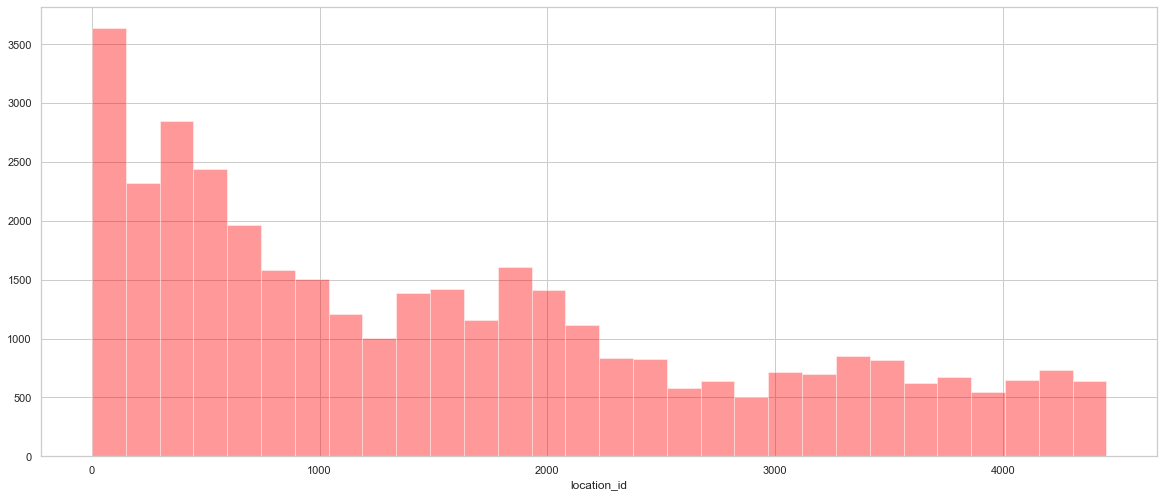

In [11]:
def sampling_k_elements(group, k=50):
    if len(group) < k:
        return group
    return group.sample(k)
df = df.groupby('location_id').apply(sampling_k_elements).reset_index(drop=True)
print(df)
sns.set(rc={'figure.figsize':(20  ,8.27)})
sns.set_style('whitegrid')
sns.distplot(df['location_id'], kde = False, color ='red', bins = 30)


# Important columns :
- spoken_words / normalized_text / raw_locatation_text
- speaking_line

## Text-Processing :
### Stemming :
We converts words into their stem/basic word, which will help TF-IDF to generalize later in our process.
### Stop-Words :
We delete from our set of words the "stop" words like " and, or " ..ect. Which won't help in the sentence meaning understanding, and would impact negatively our training.
### Tokenize :
We tokenize to get rid of punctuations which are not meaningful to our training.
### TF-IDF :
Reflects the importance of a word for a document in a collection (corpus) but does not take into account the semantic meaning of words. TF stands for the probability of occurrence of a word in a sentence.
It gives more importance to words that appear less frequently in the whole corpus and also gives importance to the most frequent words that appear in each data.
I need to extract a textual format from the text.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from unidecode import unidecode
import nltk


stemmer = SnowballStemmer(language='english')
stopwords = [unidecode(x) for x in stopwords.words('english')]
tokenizer = nltk.RegexpTokenizer(r"\w+")

df['tokenized_text'] = df['raw_text'].apply(word_tokenize) 
df['stemmed'] = df.apply(lambda x: ' '.join([stemmer.stem(token) for token in x['tokenized_text']]), axis=1)
df['cleared'] = df.apply(lambda x: ' '.join([word for word in tokenizer.tokenize(x['stemmed']) if word not in stopwords]), axis=1)

In [13]:
df

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,tokenized_text,stemmed,cleared
0,153383,549,13,"Paramedic: (QUICK) No, no, no!",216000,true,2106,1.0,Paramedic,Street,"No, no, no!",no no no,3.0,"[Paramedic, :, (, QUICK, ), No, ,, no, ,, no, !]","paramed : ( quick ) no , no , no !",paramed quick
1,75417,262,46,Bart Simpson: Who are you?,305000,True,8.0,1.0,Bart Simpson,Street,Who are you?,who are you,3.0,"[Bart, Simpson, :, Who, are, you, ?]",bart simpson : who are you ?,bart simpson
2,15824,52,267,Woman: The dryer goes on the right.,1041000,True,118.0,1.0,Woman,Street,The dryer goes on the right.,the dryer goes on the right,6.0,"[Woman, :, The, dryer, goes, on, the, right, .]",woman : the dryer goe on the right .,woman dryer goe right
3,22111,74,230,"Homer Simpson: You know, one day honest citize...",1003000,True,2.0,1.0,Homer Simpson,Street,"You know, one day honest citizens are going to...",you know one day honest citizens are going to ...,15.0,"[Homer, Simpson, :, You, know, ,, one, day, ho...","homer simpson : you know , one day honest citi...",homer simpson know one day honest citizen go s...
4,16451,54,242,Kent Brockman: Hmm huh. And I suppose you want...,1191000,True,211.0,1.0,Kent Brockman,Street,Hmm huh. And I suppose you want me to buy you ...,hmm huh and i suppose you want me to buy you a...,34.0,"[Kent, Brockman, :, Hmm, huh, ., And, I, suppo...",kent brockman : hmm huh . and i suppos you wan...,kent brockman hmm huh suppos want buy new one ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36922,158275,568,165,Homer Simpson: Is it even cheating?,1040000,true,2,4454.0,Homer Simpson,RIVERBOAT CASINO,Is it even cheating?,is it even cheating,4.0,"[Homer, Simpson, :, Is, it, even, cheating, ?]",homer simpson : is it even cheat ?,homer simpson even cheat
36923,158276,568,166,"SECURITY THUG #2: No, but-- it's just not allo...",1041000,true,6748,4454.0,SECURITY THUG #2,RIVERBOAT CASINO,"No, but-- it's just not allowed.",no but-- its just not allowed,6.0,"[SECURITY, THUG, #, 2, :, No, ,, but, --, it, ...","secur thug # 2 : no , but -- it 's just not al...",secur thug 2 allow
36924,158277,568,167,Homer Simpson: I don't get it. Football player...,1044000,true,2,4454.0,Homer Simpson,RIVERBOAT CASINO,I don't get it. Football players can do the qu...,i dont get it football players can do the quar...,27.0,"[Homer, Simpson, :, I, do, n't, get, it, ., Fo...",homer simpson : i do n't get it . footbal play...,homer simpson n get footbal player quarterback...
36925,158278,568,168,SECURITY THUG #1: I can't take any more of thi...,1051000,true,6747,4454.0,SECURITY THUG #1,RIVERBOAT CASINO,I can't take any more of this guy. Get the vise.,i cant take any more of this guy get the vise,11.0,"[SECURITY, THUG, #, 1, :, I, ca, n't, take, an...",secur thug # 1 : i ca n't take ani more of thi...,secur thug 1 ca n take ani guy get vise


In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

test_size = 0.2

df['class'] = le.fit_transform(df['location_id'])
df['class'] = le.fit_transform(df['location_id'])

le = preprocessing.LabelEncoder()
df['speaking_line'].apply(lambda x: str(x).lower())
df['speaking_line'] = le.fit_transform(df['speaking_line'].astype(str))

DF_train, DF_test = train_test_split(df, test_size=test_size, random_state=42)
vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True, norm="l2", tokenizer=lambda x: x.split(" "),
                             sublinear_tf=False, ngram_range=(1, 1))


X_train = vectorizer.fit_transform(DF_train['cleared']).todense()
X_test = vectorizer.transform(DF_test['cleared']).todense()


### I combine our TFIDF + The other features which are correlated ( but it didn't improve the learning so i deleted them )  

In [15]:
import numpy as np
# character_id, speaking_line, timestap_in_ms
print(X_train.shape)
print(X_test.shape)
print(DF_train['character_id'].values.shape)
#X_train = np.c_[X_train, DF_train['character_id'].values, DF_train['timestamp_in_ms'].values, DF_train['speaking_line'].values]
#X_test = np.c_[X_test, DF_test['character_id'].values, DF_test['timestamp_in_ms'].values, DF_test['speaking_line'].values]

y_train, y_test = DF_train['class'], DF_test['class']

print(X_train.shape)
print(X_test.shape)
print(X_train.shape)

(29541, 6526)
(7386, 6526)
(29541,)
(29541, 6526)
(7386, 6526)
(29541, 6526)


In [16]:
print(len(y_train.unique()))

1188


# Baseline Models :
I will implemet in a first step baseline models, to try to avoid bigger models that are computing heavy and to get the best ratio size or computing time / precision.
I did not train all of them because they take quite some time to, but i mentioned the code to do so and test the usual models used in this context.
## Naive Bayes : 

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [18]:
predictions = clf.predict(X_test)

# Metrics :
Because the data isn't from the beginning balanced adapted my metrics, for that i'm using a combination of precision and f1 score weighted by the class distribution.

In [19]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score

scores = precision_recall_fscore_support(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
print(precision)

0.17768845118338927


c:\users\ray\documents\shhh\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ray\documents\shhh\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Those scores are a beginning but not that good i need to look for more.

In [20]:
print(scores)

(0.17768845118338927, 0.11751963173571622, 0.10713201205608545, None)


## SGD CLassifier : 

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(n_iter=1, tol=1e-3, verbose=1)
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
scores = precision_recall_fscore_support(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
print(precision)
print(scores)

## Decision Tree : ( which are usually efficient on uneven dataset )

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
scores = precision_recall_fscore_support(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
print(precision)
print(scores)

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
scores = precision_recall_fscore_support(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
print(precision)
print(scores)

# Deep Learning
### One-Hot-Encoding :
Our output is categorical but with a large number of classes which might lead to difficulties for a single output neuron to approximate it with precision, transforming it to a OneHot format help to split the training gradient and focus it on independant and individual classes without impacting the others and usually it helps improving the final accuracy.

### Architecture :
I did a lot of finetuning : training multiple architectures small ones, biggers ones ... i didn't aim for really big architecture because the dataset isn't that big and the best results i got were with this last one. I used a MLP because it's the appropriate structure for TF-IDF.

In [36]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
from torch import optim
from IPython.display import clear_output
import numpy as np
import torch.nn.functional as F


if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  
device = "cpu"


nb_class = len(y_train.unique())
print("number of classes : "+str(nb_class))




X_train_t = torch.from_numpy(X_train.astype(np.float32)).to(device)
y_train_tensor = torch.tensor(y_train.values.astype(np.int32),dtype=torch.long)
y_train_tensor = F.one_hot(y_train_tensor).to(device)
_, targets = y_train_tensor.max(dim=1)
targets = targets.to(device)



X_test_t = torch.from_numpy(X_test.astype(np.float32)).to(device)
y_test_tensor = torch.tensor(y_test.values.astype(np.int32),dtype=torch.long)
y_test_tensor = F.one_hot(y_test_tensor).to(device)
_, targets_test = y_test_tensor.max(dim=1)
target_tests = targets_test.to(device)


print("targets shape : "+str(targets.shape))
print("y_ train tensor : "+str(y_train_tensor.shape))



number of classes : 1188
targets shape : torch.Size([29541])
y_ train tensor : torch.Size([29541, 1188])


Test precision : 0.06785166065170099


c:\users\ray\documents\shhh\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


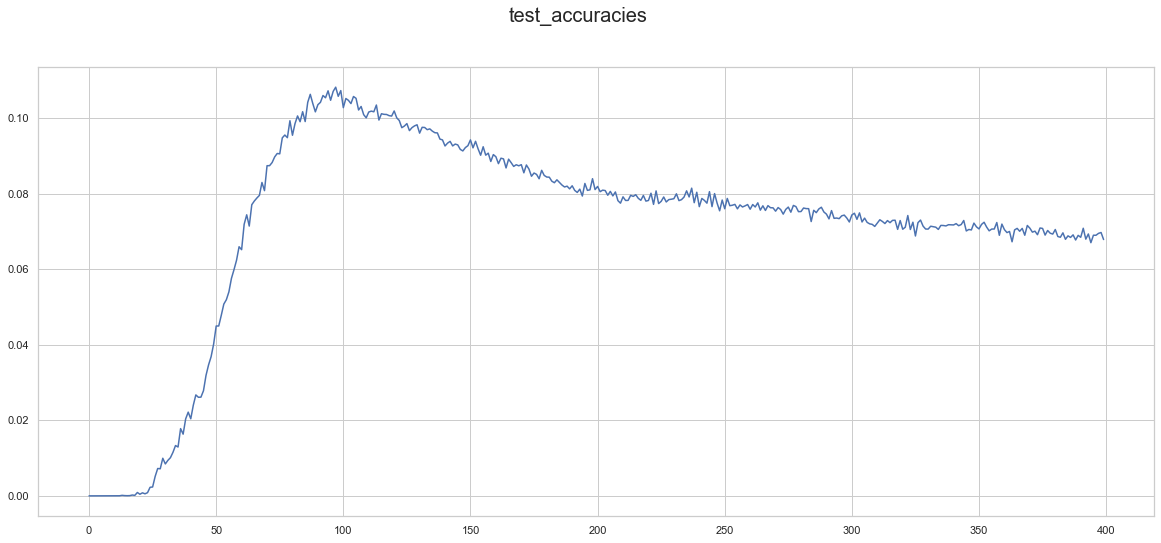

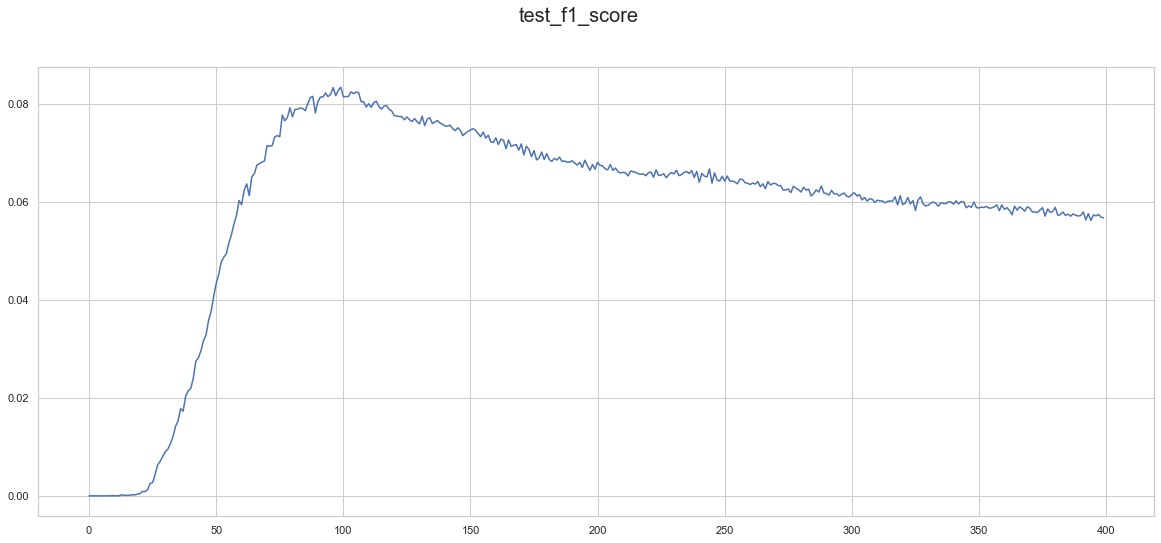

In [43]:
from sklearn.metrics import f1_score

model = nn.Sequential(
                nn.Linear(X_train.shape[1], 200),
                nn.ReLU(),
                nn.Linear(200, 100),
                nn.ReLU(),
                nn.Linear(100, 60),
                nn.ReLU(),
                nn.Linear(60, 40),
                nn.ReLU(),
                nn.Linear(40, nb_class),
                nn.LogSoftmax(dim=1))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
train_losses = []
test_losses = []

f1s = []

epochs = 400
for e in range(epochs):
    clear_output(wait=True)
    optimizer.zero_grad()
    output = model.forward(X_train_t)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model.eval()
        log_ps = model(X_test_t)
        test_loss = criterion(log_ps, target_tests)
        reverted = torch.argmax(log_ps, dim=1)
        test_accuracy = precision_score(targets_test, reverted, average='weighted')
        f1_s = f1_score(targets_test, reverted, average='weighted')
        print("Test precision : "+str(test_accuracy))
        test_losses.append(test_accuracy)
        f1s.append(f1_s)
    fig = plt.figure()
    plt.plot(test_losses)
    fig.suptitle('test_accuracies', fontsize=20)
    plt.show()
    
    fig = plt.figure()
    plt.plot(f1s)
    fig.suptitle('test_f1_score', fontsize=20)
    plt.show()


### I did not get good results but that might be improved by using the initial distribution and creating separate models : one fort the main characters of the show and one for the side characters ( or even a third one for characters which appears only one episode )

## Second Approach : Feature Reduction

In [19]:
print(X_train.shape)
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
X_test_pca = pca.transform(X_test)

(29541, 6522)
[0.01630644 0.01027893 0.00888532 0.00841243 0.00627937 0.00509493
 0.00496001 0.00475581 0.00440494 0.0042779 ]


## Not Enough Explained Variance Ratio ( previsible ) might use Latent semantic indexing

## Third Approach : Word-Embedding
A second approach would be to use to remplace TF-IDF a word-embedding, for example Word2Vec is a model trained on :
CBOW: The model is fed by the context, and predicts the target word. The result of the hidden layer is the new representation of the word (ℎ1,…, ℎ𝑁).

Skip Gram: The model is fed by the target word, and predicts the words of the context. The result of the hidden layer is the new representation of the word (ℎ1,…, ℎ𝑁).

This permits the creation of an embedding vector which represents a spatial/dimensional representation of each of our words. And this will be used for training a neural network.

In [17]:
df

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,tokenized_text,stemmed,cleared,class
0,153383,549,13,"Paramedic: (QUICK) No, no, no!",216000,1,2106,1.0,Paramedic,Street,"No, no, no!",no no no,3.0,"[Paramedic, :, (, QUICK, ), No, ,, no, ,, no, !]","paramed : ( quick ) no , no , no !",paramed quick,0
1,75417,262,46,Bart Simpson: Who are you?,305000,0,8.0,1.0,Bart Simpson,Street,Who are you?,who are you,3.0,"[Bart, Simpson, :, Who, are, you, ?]",bart simpson : who are you ?,bart simpson,0
2,15824,52,267,Woman: The dryer goes on the right.,1041000,0,118.0,1.0,Woman,Street,The dryer goes on the right.,the dryer goes on the right,6.0,"[Woman, :, The, dryer, goes, on, the, right, .]",woman : the dryer goe on the right .,woman dryer goe right,0
3,22111,74,230,"Homer Simpson: You know, one day honest citize...",1003000,0,2.0,1.0,Homer Simpson,Street,"You know, one day honest citizens are going to...",you know one day honest citizens are going to ...,15.0,"[Homer, Simpson, :, You, know, ,, one, day, ho...","homer simpson : you know , one day honest citi...",homer simpson know one day honest citizen go s...,0
4,16451,54,242,Kent Brockman: Hmm huh. And I suppose you want...,1191000,0,211.0,1.0,Kent Brockman,Street,Hmm huh. And I suppose you want me to buy you ...,hmm huh and i suppose you want me to buy you a...,34.0,"[Kent, Brockman, :, Hmm, huh, ., And, I, suppo...",kent brockman : hmm huh . and i suppos you wan...,kent brockman hmm huh suppos want buy new one ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36922,158275,568,165,Homer Simpson: Is it even cheating?,1040000,1,2,4454.0,Homer Simpson,RIVERBOAT CASINO,Is it even cheating?,is it even cheating,4.0,"[Homer, Simpson, :, Is, it, even, cheating, ?]",homer simpson : is it even cheat ?,homer simpson even cheat,1187
36923,158276,568,166,"SECURITY THUG #2: No, but-- it's just not allo...",1041000,1,6748,4454.0,SECURITY THUG #2,RIVERBOAT CASINO,"No, but-- it's just not allowed.",no but-- its just not allowed,6.0,"[SECURITY, THUG, #, 2, :, No, ,, but, --, it, ...","secur thug # 2 : no , but -- it 's just not al...",secur thug 2 allow,1187
36924,158277,568,167,Homer Simpson: I don't get it. Football player...,1044000,1,2,4454.0,Homer Simpson,RIVERBOAT CASINO,I don't get it. Football players can do the qu...,i dont get it football players can do the quar...,27.0,"[Homer, Simpson, :, I, do, n't, get, it, ., Fo...",homer simpson : i do n't get it . footbal play...,homer simpson n get footbal player quarterback...,1187
36925,158278,568,168,SECURITY THUG #1: I can't take any more of thi...,1051000,1,6747,4454.0,SECURITY THUG #1,RIVERBOAT CASINO,I can't take any more of this guy. Get the vise.,i cant take any more of this guy get the vise,11.0,"[SECURITY, THUG, #, 1, :, I, ca, n't, take, an...",secur thug # 1 : i ca n't take ani more of thi...,secur thug 1 ca n take ani guy get vise,1187


In [18]:
dc = df['cleared'].apply(lambda x: x.split(' '))

In [19]:
import gensim.downloader as api
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'

print(dc)
model = KeyedVectors.load_word2vec_format(filename, binary=True)

c:\users\ray\documents\shhh\env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


0                                         [paramed, quick]
1                                          [bart, simpson]
2                               [woman, dryer, goe, right]
3        [homer, simpson, know, one, day, honest, citiz...
4        [kent, brockman, hmm, huh, suppos, want, buy, ...
                               ...                        
36922                        [homer, simpson, even, cheat]
36923                              [secur, thug, 2, allow]
36924    [homer, simpson, n, get, footbal, player, quar...
36925    [secur, thug, 1, ca, n, take, ani, guy, get, v...
36926             [homer, simpson, smug, knew, vise, knew]
Name: cleared, Length: 36927, dtype: object


In [107]:
global_min = 130
def get_transform(values):
    words_emb = []
    
    for word in values:
        try:
            # Get embedding association
            words_emb.append(  model[word] )
        except:
            # If no association skip
            pass
        # Padding to get equal vectors
    if len(words_emb)<global_min:
        words_emb += [0]*(global_min - len(words_emb))
    return words_emb
dc = df['tokenized_text']
wordvec_rep = dc.apply(lambda x: get_transform(x))

In [108]:
# print(wordvec_rep.values)
wordvec_rep = np.array([np.array(xi) for xi in wordvec_rep.values])

C:\Users\Ray\AppData\Local\Temp/ipykernel_7692/3862667238.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  wordvec_rep = np.array([np.array(xi) for xi in wordvec_rep.values])


In [101]:
X_train, X_test, y_train, y_test  = train_test_split(wordvec_rep, y, test_size=test_size, random_state=42)
print(X_train.shape)
print(y_train.shape)


(29541, 130)
(29541,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score

clf = MultinomialNB()
print(X_train.shape)
print(y_train.shape)
y_train = np.array(y_train)
clf.fit(X_train, list(y_train))

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
scores = precision_recall_fscore_support(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
print(precision)
print(scores)

# Fourth Approach : Using a pretrained model from the state-of-art and transfer it to this task.